# 차원 축소에 대한 테스트
* 정치적 진영별 트위터 문장에서 빈도수 높은 단어를 뽑아 projection시키는 프로젝트
* 하지만 진보/보수 두 진영의 단어 분포를 구분하기 어려움
* 단어에 대한 벡터 임베딩 및 차원 축소의 문제일 것이다.

### ** -> 벡터 임베딩(word2vec)와 차원 축소(PCA)에 대해 파라미터를 좋은 결과를 찾아보자! **

## 1. 기본 문장 데이터 가져오기

In [160]:
import pandas as pd
from konlpy.tag import Twitter

In [161]:
df = pd.read_csv('tweet.csv')
df

,Twitter_ID,Screen_Name,Inclination,Date,URL,Contents,Favorite,Retweet
0,101674890,yesKP,1,2010-03-05 10:03:26,10000403029,@luvsinae @archisch @saypeace ㅣ\n네 덕분에요~,0,0
1,101674890,yesKP,1,2010-03-05 10:25:46,10001351228,RT @angelk7177: 깨달음을 얻는 데 때와 장소는 중요하지 않다! -혜초-,0,1
2,49004147,cleanshim,1,2011-08-07 14:30:32,100076337326325760,@whalzzaq 잼나는 구름 찍었네요. 멋진 감성이어요~!,0,0
3,53031381,Bulloger,2,2011-08-07 16:42:22,100109511511113728,RT @mksunjung: @Bulloger 시장님 RT부탁드려요~~공항철도에서.....,4,8
4,131983524,hopekbk,2,2011-08-07 23:04:44,100205739200614400,RT @twgorky: 그래서 어쩌라고 ? 니는 뭔 의견있나 ?걍 그런 자조적 진...,0,1
5,155236262,okkimss,2,2011-08-08 09:11:58,100358551993724929,해는 기울고 이젠 미국 경제가 온 동네 민폐끼치는 발원지. 신평사와 미 관리들의 입...,0,0
6,74642156,jinpyokim,2,2011-08-08 09:19:26,100360433667555328,2012년은 총선과대선이 한해에 있는해입니다. 어느때보다도 중립성과공정성이 중요하다...,0,2
7,74642156,jinpyokim,2,2011-08-08 09:22:49,100361283559358464,황우여 대표의 \n'0세부터 전면 무상보육'\n반가운소리긴하지만..\n182억의혈세...,0,7
8,74642156,jinpyokim,2,2011-08-08 09:28:26,100362699585761280,RT @mbcsisun: [인터뷰 전문] 8/8 (월) 박선숙 민주당 의원 - 저...,0,4
9,74642156,jinpyokim,2,2011-08-08 09:49:22,100367967530913792,RT @LeaderSangKwon: [인사청문회] 8월 8일 권재진 법무부장관 후보...,0,2


In [162]:
print(len(df))

79219


In [163]:
pos_tagger = Twitter()

def tokenize(doc):
    result = list()
    for s in pos_tagger.pos(doc, norm=True, stem=True):
        if s[1] in ['Noun','Verb','Adjective']:
            result.append(s[0])
    return result

In [164]:
train_docs = list()
for sentence in df['Contents']:
    try:
        train_docs.append(tokenize(sentence))
    except Exception as e:
        continue

In [165]:
print(train_docs[:10])

[['네', '덕분'], ['깨달음', '얻다', '데', '때', '장소', '중요하다', '않다', '혜초'], ['재다', '구름', '찍다', '멋지다', '감성', '어요'], ['시장님', '부탁드리다', '공항철도', '연두색', '케이스', '하다', '아이폰', '습득', '하다', '전', '밤', '시', '분', '홍대', '입구', '인천공항', '행', '타다', '검암역', '지나다'], ['니', '의견', '있다', '그렇다', '자', '조적', '진술', '그치다', '담론', '말르다', '서울', '시민', '여론', '대한민국', '중심', '점', '것', '누구', '부인', '하다', '않다', '이번', '무상급식', '관련', '투표', '하나', '중간', '평'], ['해', '기울다', '젠', '미국', '경제', '온', '동네', '민폐', '끼다', '발원', '신평', '사오다', '밉다', '관리', '입', '씨름', '가관', '글로벌', '리스크', '방비', '태세', '재', '확인', '긴요'], ['년', '총선', '대선', '한해', '있다', '이다', '때', '중립성', '공정', '중요하다', '대통령', '비서', '출신', '누님', '라인', '각종', '의혹', '두루', '갖추다', '후보', '이기', '때문', '의', '법무', '장관', '최적', '후보', '국민', '입장', '절대', '부적', '격후', '보이다'], ['황우여', '대표', '세', '전면', '무상', '보육', '반갑다', '소리', '기다', '억', '혈세', '버리다', '무상급식', '반대', '하다', '정당', '것', '관철', '되다', '황우여', '대표', '꺼내다', '들다', '반값등록금', '약속', '지키다', '야하다'], ['인터뷰', '전문', '월', '박선숙', '민주당', '의원', '저축은행', '국정조사', '어떻다', '진행', '되다']

## 2. plot할 200개의 진영별 단어 뽑아내기(빈도수 기반)

In [166]:
# 정치인 리스트 및 딕셔너리
politician_dic={"김부겸":"hopekbk", "김성식":"okkimss", "김진표":"jinpyokim",
          "문재인":"moonriver365", "민병두":"bdmin1958", "박범계":"bkfire1004",
          "박영선":"Park_Youngsun", "박원순":"wonsoonpark", "박지원":"jwp615",
          "송영길":"Bulloger", "안철수":"cheolsoo0919", "안희정":"steelroot",
          "이재명":"Jaemyung_Lee","정동영":"coreacdy","정세균":"sk0926",
          "진영":"Chinyoung0413", "천정배":"jb_1000", "추미애":"choomiae",
          "표창원":"DrPyo",
          "김무성":"kimmoosung","김진태":"jtkim1013","나경원":"Nakw",
          "남경필":"yesKP","서청원":"scw0403","심재철":"cleanshim",
          "원유철":"won6767","원희룡":"wonheeryong","이준석":"junseokandylee",
          "장제원":"Changjewon","정우택":"bigwtc","정진석":"js0904",
          "최경환":"khwanchoi"}

left_politician = ["김부겸","김성식","김진표","문재인","민병두","박범계","박영선",
                "박원순","박지원","송영길","안철수","안희정","이재명","정동영",
                "정세균","진영","천정배","추미애","표창원"]
left_Screen_Name = ["hopekbk", "okkimss", "jinpyo_kim", "moonriver365",
                    "bdmin1958", "bkfire1004", "Park_Youngsun", "wonsoonpark",
                    "jwp615", "Bulloger", "cheolsoo0919", "steelroot",
                    "Jaemyung_Lee","coreacdy","sk0926", "Chinyoung0413",
                    "jb_1000", "choomiae", "DrPyo"]

right_politician = ["김무성","김진태","나경원","남경필","서청원","심재철","원유철",
                 "원희룡","이준석","장제원","정우택","정진석","최경환"]
right_Screen_Name = ["kimmoosung","jtkim1013","Nakw","yesKP","scw0403",
                    "cleanshim","won6767","wonheeryong","junseokandylee",
                    "Changjewon","bigwtc","js0904","khwanchoi"]

left_select = left_politician
right_select = right_politician


def make_Screen_Name_list(people_list):
    result_list = []
    for one in people_list:
        result_list.append(politician_dic[one])
    return result_list

In [167]:
from NLP import *
left_word = get_frequent_words(make_Screen_Name_list(left_select), ["left_frequency", "left_reply_frequency"])
right_word = get_frequent_words(make_Screen_Name_list(right_select), ["right_frequency", "right_reply_frequency"])

## 3. 테스팅
1. word2vec를 학습시킨다. -> n차원으로 학습
2. PCA로 차원을 축소시킨다. -> 3차원으로 축소
3. 3차원 벡터 플로팅(plot)

### -> 최적의 n을 구해보자

# 1) word2vec 100차원

In [168]:
from gensim.models import word2vec
import numpy as np
from sklearn.decomposition import PCA

In [169]:
model = word2vec.Word2Vec(train_docs, size=100)

In [170]:
print(model.most_similar('대통령'))

[('전대통령', 0.7239220142364502), ('정부', 0.6494126319885254), ('게이트', 0.6408077478408813), ('하야', 0.6260746121406555), ('퇴진', 0.6220934391021729), ('이명', 0.6210383176803589), ('정권', 0.6044184565544128), ('갑론', 0.602541446685791), ('총리', 0.5941697359085083), ('남매', 0.5923844575881958)]


In [171]:
left_vec = list()
for word in left_word:
    try:
        left_vec.append(model[word[0]])
    except:
        print(word)
        left_vec.append(model['실패'])
    
right_vec = list()
for word in right_word:
    try:
        right_vec.append(model[word[0]])
    except:
        print(word)
        right_vec.append(model['실패'])

('함께', 2598)
('많이', 1464)
('많이', 1007)
('함께', 922)
('열심히', 548)


* **explained variance test**

In [172]:
pca = PCA(n_components=100)

In [173]:
pca.fit(left_vec + right_vec)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [174]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.10502327  0.20277518  0.27550079  0.33736558  0.39267404  0.43716822
  0.47813145  0.51811397  0.55113944  0.58148386  0.6106302   0.63687693
  0.66272392  0.6866322   0.70988425  0.73256714  0.75240712  0.76976088
  0.7866343   0.80137223  0.81516008  0.82863777  0.84148863  0.85328913
  0.86418878  0.87451292  0.88418518  0.89317549  0.90169554  0.90971502
  0.91695707  0.92367074  0.9300403   0.93557576  0.94082855  0.94582499
  0.95063966  0.95529156  0.95959182  0.96350848  0.96713729  0.97017573
  0.97294439  0.97556749  0.97801868  0.9801089   0.98198762  0.98377162
  0.98540036  0.98694926  0.9883778   0.98965924  0.99077177  0.99175947
  0.99271071  0.99352086  0.9942313   0.99486024  0.99546374  0.9959957
  0.99651298  0.99688963  0.9972372   0.99756866  0.99784386  0.99808319
  0.9983141   0.9985235   0.99869929  0.9988535   0.99898493  0.99909888
  0.99919998  0.9992927   0.99938091  0.9994605   0.99953618  0.99960571
  0.99965367  0.99969994  0.9997384   0.99977302  0.

In [175]:
pca = PCA(n_components=3)
pca.fit(left_vec + right_vec)
left_vec = pca.transform(left_vec)
right_vec = pca.transform(right_vec)

* ** Projection **

In [176]:
%matplotlib inline
import matplotlib.pyplot as plt

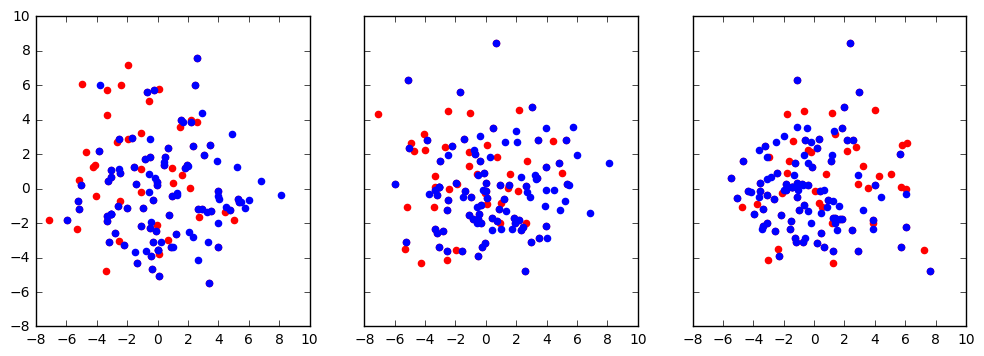

In [177]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)

ax1.scatter(
    [x[0] for x in left_vec[:]], [x[1] for x in left_vec[:]], marker='o', color='red')
ax1.scatter(
    [x[0] for x in right_vec[:]], [x[1] for x in right_vec[:]], marker='o', color='blue')

ax2.scatter(
    [x[0] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax2.scatter(
    [x[0] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

ax3.scatter(
    [x[1] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax3.scatter(
    [x[1] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

# 2) word2vec 30차원

In [178]:
model = word2vec.Word2Vec(train_docs, size=30)

In [179]:
print(model.most_similar('대통령'))

[('전대통령', 0.7507018446922302), ('이명', 0.7197017073631287), ('하야', 0.7112314105033875), ('갑론', 0.6935097575187683), ('퇴진', 0.6768588423728943), ('정권', 0.6484034657478333), ('총리', 0.6467268466949463), ('게이트', 0.6458223462104797), ('정부', 0.6356090307235718), ('청와대', 0.609585165977478)]


In [180]:
left_vec = list()
for word in left_word:
    try:
        left_vec.append(model[word[0]])
    except:
        print(word)
        left_vec.append(model['실패'])
    
right_vec = list()
for word in right_word:
    try:
        right_vec.append(model[word[0]])
    except:
        print(word)
        right_vec.append(model['실패'])

('함께', 2598)
('많이', 1464)
('많이', 1007)
('함께', 922)
('열심히', 548)


* **explained variance test**

In [181]:
pca = PCA(n_components=30)

In [182]:
pca.fit(left_vec + right_vec)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [183]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.12100786  0.23085013  0.31157909  0.38261985  0.4450406   0.49749954
  0.54693557  0.59250213  0.62908822  0.66353392  0.69557757  0.72564256
  0.75436328  0.78183335  0.80608786  0.8297906   0.85124967  0.87111799
  0.88789766  0.9033739   0.91809422  0.93153978  0.94449222  0.95657301
  0.96564325  0.97376373  0.98120042  0.98812589  0.99465056  1.        ]


In [184]:
pca = PCA(n_components=3)
pca.fit(left_vec + right_vec)
left_vec = pca.transform(left_vec)
right_vec = pca.transform(right_vec)

* ** Projection **

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt

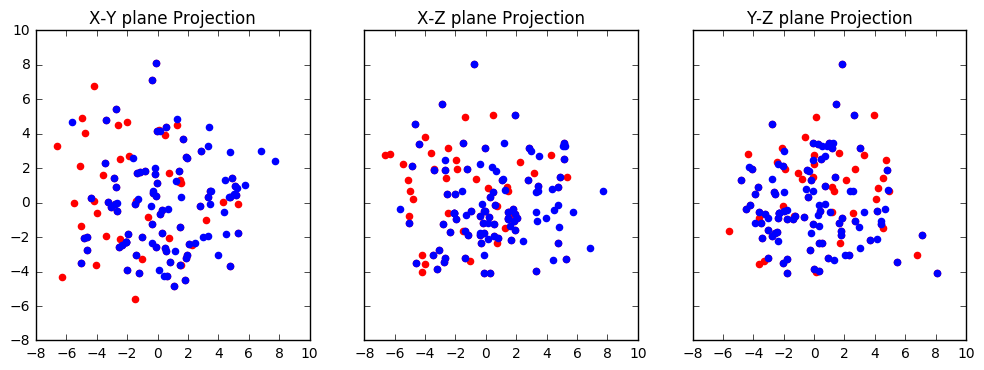

In [186]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)

ax1.set_title('X-Y plane Projection')
ax1.scatter(
    [x[0] for x in left_vec[:]], [x[1] for x in left_vec[:]], marker='o', color='red')
ax1.scatter(
    [x[0] for x in right_vec[:]], [x[1] for x in right_vec[:]], marker='o', color='blue')

ax2.set_title('X-Z plane Projection')
ax2.scatter(
    [x[0] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax2.scatter(
    [x[0] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

ax3.set_title('Y-Z plane Projection')
ax3.scatter(
    [x[1] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax3.scatter(
    [x[1] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

# 3) word2vec 10차원

In [187]:
model = word2vec.Word2Vec(train_docs, size=10)

In [188]:
print(model.most_similar('대통령'))

[('정권', 0.8704462051391602), ('이명', 0.861924946308136), ('불', 0.8587296605110168), ('멘탈', 0.8582468032836914), ('전대통령', 0.8485005497932434), ('패배', 0.8345639705657959), ('대선', 0.8325781226158142), ('총리', 0.830809473991394), ('새누리', 0.8273205757141113), ('공', 0.8206331729888916)]


In [189]:
left_vec = list()
for word in left_word:
    try:
        left_vec.append(model[word[0]])
    except:
        print(word)
        left_vec.append(model['실패'])
    
right_vec = list()
for word in right_word:
    try:
        right_vec.append(model[word[0]])
    except:
        print(word)
        right_vec.append(model['실패'])

('함께', 2598)
('많이', 1464)
('많이', 1007)
('함께', 922)
('열심히', 548)


* **explained variance test**

In [190]:
pca = PCA(n_components=10)

In [191]:
pca.fit(left_vec + right_vec)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [192]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.20198968  0.39214183  0.52137074  0.64078707  0.74098872  0.81902668
  0.88362368  0.93596286  0.97569706  1.        ]


In [193]:
pca = PCA(n_components=3)
pca.fit(left_vec + right_vec)
left_vec = pca.transform(left_vec)
right_vec = pca.transform(right_vec)

* ** Projection **

In [194]:
%matplotlib inline
import matplotlib.pyplot as plt

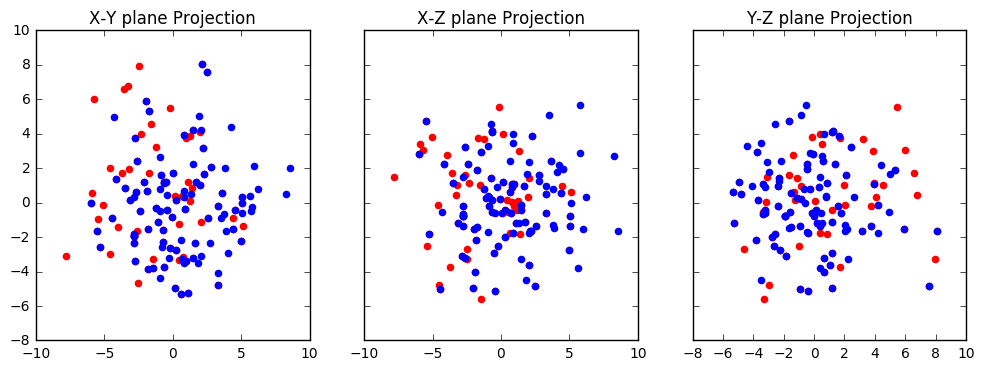

In [195]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)

ax1.set_title('X-Y plane Projection')
ax1.scatter(
    [x[0] for x in left_vec[:]], [x[1] for x in left_vec[:]], marker='o', color='red')
ax1.scatter(
    [x[0] for x in right_vec[:]], [x[1] for x in right_vec[:]], marker='o', color='blue')

ax2.set_title('X-Z plane Projection')
ax2.scatter(
    [x[0] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax2.scatter(
    [x[0] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

ax3.set_title('Y-Z plane Projection')
ax3.scatter(
    [x[1] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax3.scatter(
    [x[1] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

# 4) word2vec 5차원

In [196]:
model = word2vec.Word2Vec(train_docs, size=5)

In [197]:
print(model.most_similar('대통령'))

[('탄핵', 0.9885929822921753), ('새누리', 0.9749019145965576), ('언론', 0.972369909286499), ('노무현', 0.9713342189788818), ('입장', 0.9701582193374634), ('대화', 0.9584629535675049), ('밝히다', 0.9573042392730713), ('박근혜', 0.9554398059844971), ('야당', 0.9514652490615845), ('공개', 0.947281539440155)]


In [198]:
left_vec = list()
for word in left_word:
    try:
        left_vec.append(model[word[0]])
    except:
        print(word)
        left_vec.append(model['실패'])
    
right_vec = list()
for word in right_word:
    try:
        right_vec.append(model[word[0]])
    except:
        print(word)
        right_vec.append(model['실패'])

('함께', 2598)
('많이', 1464)
('많이', 1007)
('함께', 922)
('열심히', 548)


* **explained variance test**

In [199]:
pca = PCA(n_components=5)

In [200]:
pca.fit(left_vec + right_vec)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [201]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.29959238  0.58588537  0.79155459  0.95228631  1.        ]


In [202]:
pca = PCA(n_components=3)
pca.fit(left_vec + right_vec)
left_vec = pca.transform(left_vec)
right_vec = pca.transform(right_vec)

* ** Projection **

In [203]:
%matplotlib inline
import matplotlib.pyplot as plt

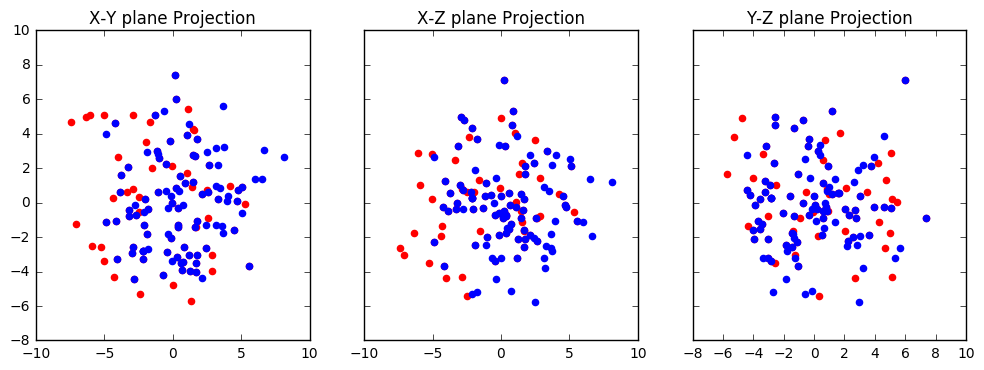

In [204]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)

ax1.set_title('X-Y plane Projection')
ax1.scatter(
    [x[0] for x in left_vec[:]], [x[1] for x in left_vec[:]], marker='o', color='red')
ax1.scatter(
    [x[0] for x in right_vec[:]], [x[1] for x in right_vec[:]], marker='o', color='blue')

ax2.set_title('X-Z plane Projection')
ax2.scatter(
    [x[0] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax2.scatter(
    [x[0] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

ax3.set_title('Y-Z plane Projection')
ax3.scatter(
    [x[1] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax3.scatter(
    [x[1] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

# 5) word2vec 3차원

In [205]:
model = word2vec.Word2Vec(train_docs, size=3)

In [206]:
print(model.most_similar('대통령'))

[('외교', 0.9999204874038696), ('검사', 0.9999178051948547), ('개선', 0.9998339414596558), ('사찰', 0.9998202323913574), ('규제', 0.9997895956039429), ('감세', 0.9997525215148926), ('반대', 0.99969881772995), ('공천', 0.9996697902679443), ('보호', 0.9995205402374268), ('체제', 0.9994304180145264)]


In [207]:
left_vec = list()
for word in left_word:
    try:
        left_vec.append(model[word[0]])
    except:
        print(word)
        left_vec.append(model['실패'])
    
right_vec = list()
for word in right_word:
    try:
        right_vec.append(model[word[0]])
    except:
        print(word)
        right_vec.append(model['실패'])

('함께', 2598)
('많이', 1464)
('많이', 1007)
('함께', 922)
('열심히', 548)


* **explained variance test**

In [208]:
pca = PCA(n_components=3)

In [209]:
pca.fit(left_vec + right_vec)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [210]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.45393473  0.89770324  1.        ]


* ** Projection **

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt

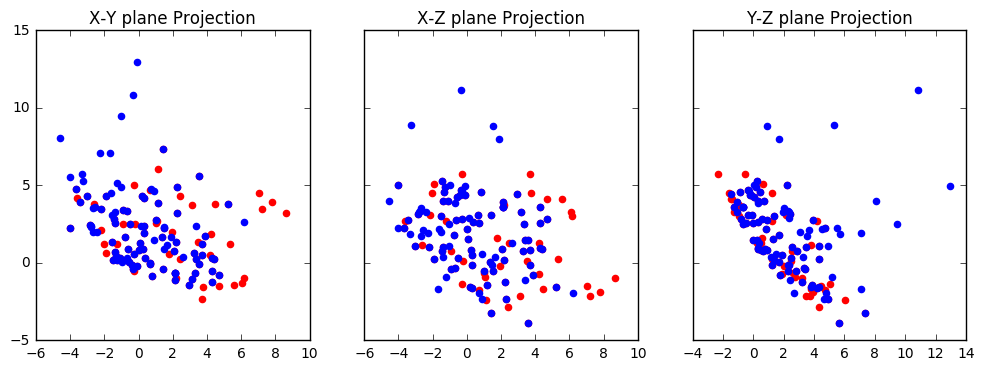

In [212]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)

ax1.set_title('X-Y plane Projection')
ax1.scatter(
    [x[0] for x in left_vec[:]], [x[1] for x in left_vec[:]], marker='o', color='red')
ax1.scatter(
    [x[0] for x in right_vec[:]], [x[1] for x in right_vec[:]], marker='o', color='blue')

ax2.set_title('X-Z plane Projection')
ax2.scatter(
    [x[0] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax2.scatter(
    [x[0] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

ax3.set_title('Y-Z plane Projection')
ax3.scatter(
    [x[1] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax3.scatter(
    [x[1] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

# 6) word2vec 5차원 & 따로따로 pca

In [213]:
model = word2vec.Word2Vec(train_docs, size=5)

In [214]:
print(model.most_similar('대통령'))

[('밝히다', 0.9930317401885986), ('입장', 0.9900082349777222), ('탄핵', 0.985214352607727), ('대해', 0.9829111099243164), ('새누리', 0.9798495769500732), ('야당', 0.9744730591773987), ('박근혜', 0.9705538749694824), ('탈당', 0.9685747623443604), ('퇴진', 0.9607391357421875), ('노무현', 0.9565014839172363)]


In [215]:
left_vec = list()
for word in left_word:
    try:
        left_vec.append(model[word[0]])
    except:
        print(word)
        left_vec.append(model['실패'])
    
right_vec = list()
for word in right_word:
    try:
        right_vec.append(model[word[0]])
    except:
        print(word)
        right_vec.append(model['실패'])

('함께', 2598)
('많이', 1464)
('많이', 1007)
('함께', 922)
('열심히', 548)


* **explained variance test**

In [216]:
pca = PCA(n_components=5)

In [217]:
pca.fit(left_vec)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [218]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.34329214  0.62834494  0.84069789  0.98998162  1.        ]


In [219]:
pca = PCA(n_components=5)

In [220]:
pca.fit(right_vec)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [221]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.31064659  0.56480286  0.75550962  0.93063695  1.        ]


In [222]:
pca = PCA(n_components=3)
pca.fit(left_vec)
left_vec = pca.transform(left_vec)
pca.fit(right_vec)
right_vec = pca.transform(right_vec)

* ** Projection **

In [223]:
%matplotlib inline
import matplotlib.pyplot as plt

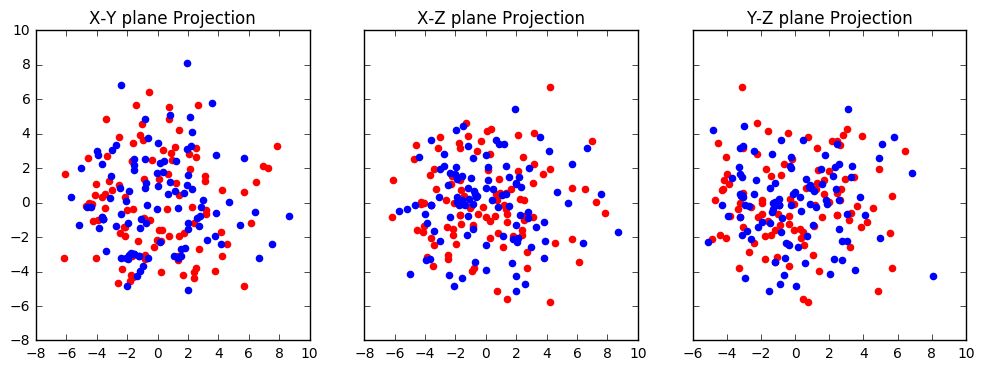

In [224]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)

ax1.set_title('X-Y plane Projection')
ax1.scatter(
    [x[0] for x in left_vec[:]], [x[1] for x in left_vec[:]], marker='o', color='red')
ax1.scatter(
    [x[0] for x in right_vec[:]], [x[1] for x in right_vec[:]], marker='o', color='blue')

ax2.set_title('X-Z plane Projection')
ax2.scatter(
    [x[0] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax2.scatter(
    [x[0] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')

ax3.set_title('Y-Z plane Projection')
ax3.scatter(
    [x[1] for x in left_vec[:]], [x[2] for x in left_vec[:]], marker='o', color='red')
ax3.scatter(
    [x[1] for x in right_vec[:]], [x[2] for x in right_vec[:]], marker='o', color='blue')